![](../src/image/meli3.JPG)

# Entrenamiento, y Modelado y Validacion del Classifier

#### Ya teniendo en nuestro embedding de la data fuente, realizaremos el entrenamiento de 3 modelos de Clasificacion, RandomForest, SVMClassifier y el XGBOOST. para ver cual de ellos nos clasifica mejor.


### Pasos
1. [Preparacion de la data.](#1)
1. [Modelado y entrenamiento](#2)
1. [Validacion](#3)

<a id="1"></a> <br>
# 1. Preparacion de la Data

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from ast import literal_eval


In [37]:
#Leo los datos ya procesados con los embeddings de 3-small
df_270 = pd.read_csv("D:\Clustering_MeLi\src\data\processed\data_embedding_numeric_wo_rp.csv")


In [38]:
df_270["embedding"] = df_270.embedding.apply(literal_eval).apply(np.array)
print(df_270.shape)
df_270.head(2)

(1200, 11)


,Unnamed: 0,seller_nickname,stock,price,Products,total_amount,Kmeans,AgC,mix,tokens,embedding
0,0,5916f2ce4b,1,14999999.0,1,14999999.0,2,2,Stock: 1; Price: 14999999.0; Products: 1; tot...,29,"[0.02232317067682743, -0.038039837032556534, 0..."
1,1,02db3ca90d,118,182727.0,23,21561786.0,5,1,Stock: 118; Price: 182727.0; Products: 23; to...,28,"[-0.00459056394174695, -0.05380024015903473, 0..."


In [39]:
# Separo la data de validacion de la train y test,
df_val=df_270[df_270['Kmeans'].isnull()]
print(df_val.shape)
df_270=df_270[df_270['Kmeans'].isnull()==False]
df_270[df_270['Kmeans'].isnull()] # Valido que ninguno no tengan datos con valores en la etiqueta

print(df270.shape)
df_val = df_270.tail(50) # extraigo 50 registros pa validar
df_270 = df_270.iloc[:-50,:]
df_270.shape

(0, 11)
(1200, 11)


(1150, 11)

In [40]:
# Obtenemos los datos de entrenamiento y de test

x_train,x_test,y_train,y_test = train_test_split(
    list(df_270.embedding.values),df_270.Kmeans,test_size=20,random_state=13
)

df_270['Kmeans'].value_counts()

Kmeans
4    195
2    194
0    193
5    192
1    188
3    188
Name: count, dtype: int64

<a id="2"></a> <br>
# 2. Modelado y entrenamiento.

# RANDOM-FOREST - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.60      1.00      0.75         3

    accuracy                           0.85        20
   macro avg       0.91      0.87      0.86        20
weighted avg       0.88      0.85      0.85        20



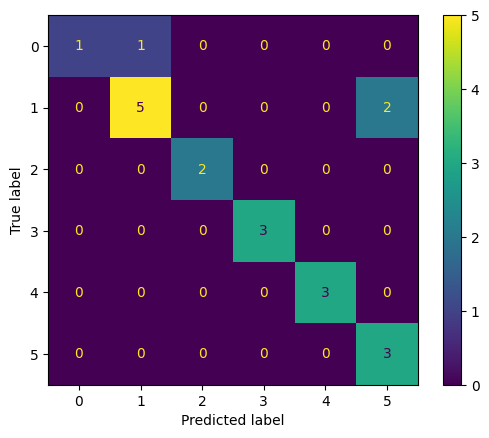

In [41]:
# Modelado, Entrenamiento, Evaluacion
RFclf = RandomForestClassifier(n_estimators=100) #iniciamos el modelo
RFclf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones
probas = clf.predict_proba(x_test) #realizamos las probabilidades

report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

## SUPPORT VECTOR MACHINE - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.60      1.00      0.75         3

    accuracy                           0.85        20
   macro avg       0.91      0.87      0.86        20
weighted avg       0.88      0.85      0.85        20



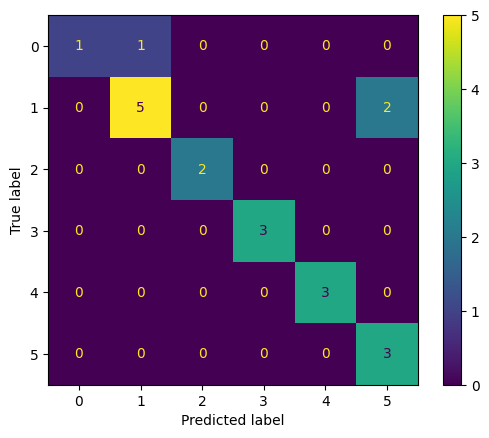

In [42]:
# Modelado, Entrenamiento, Evaluacion
SVMclf = SVC() #iniciamos el modelo
SVMclf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

# XGBOOST - CLASSIFIER

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.60      1.00      0.75         3

    accuracy                           0.85        20
   macro avg       0.91      0.87      0.86        20
weighted avg       0.88      0.85      0.85        20



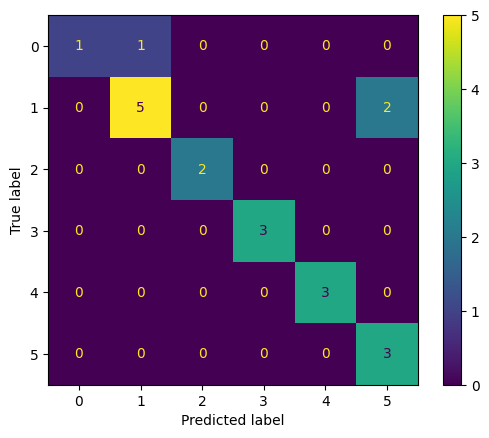

In [43]:
# Modelado, Entrenamiento, Evaluacion
XGBclf = XGBClassifier() #iniciamos el modelo
XGBclf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

<a id="3"></a> <br>
# 3. Validacion

#### Los resultados con la data sin variables categoricas (Clustering v3), sin la variable Regular_Price, en el modelado todos son perfectos con un valor de accuracy 85%. y como vemos mas adelante se obtiene un accuracy de 78% un valor muy bueno. teniendo en cuenta que no se han modificado hyperparametros de los modelos seleccionados.

<class 'numpy.int64'>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.60      0.25      0.35        12
           2       1.00      1.00      1.00         6
           3       0.73      0.92      0.81        12
           4       1.00      1.00      1.00         5
           5       0.58      0.88      0.70         8

    accuracy                           0.78        50
   macro avg       0.82      0.84      0.81        50
weighted avg       0.77      0.78      0.75        50



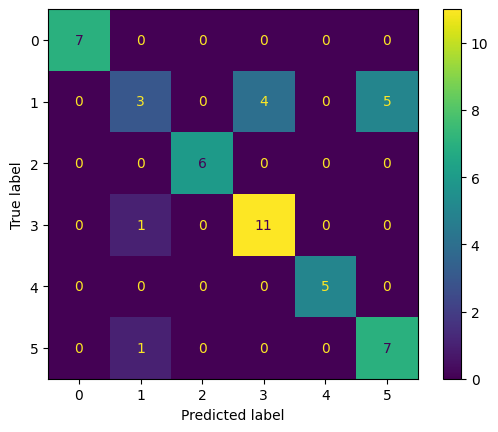

In [45]:
# AHora haremos las validacion con el set validacion df_val de 50 registros, registros nos vistos en el entrenamiento escogeremos solo un modelo
xval=list(df_val.embedding.values)
yval=df_val['Kmeans']
ypredict= RFclf.predict(xval).astype(int)
print(type(ypredict[1]))
# Evaluamos la prediccion
report = classification_report(yval, ypredict)
print(report)
matrix = confusion_matrix(y_pred= ypredict ,y_true= yval)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()
